
### Source 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/my-blog-post-01) is a link to the source code for this perceptron blog post.

### Introduction.
In this blog post, we implement the perceptron algorithm, which is oftentimes the first machine learning algorithm a student encounters in a machine learning class (which is at least true in my case). We write code in Python for this implementation, and our goal is to classify binary labeled artificial data.

### Implementation 

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, let's import some libraries that we need.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

In the following code cell, we will generate a linearly separable dataset of binary-labeled 2D points. The `make_blobs` function essentially takes $n$ samples, a number of features, and classes, and spits out a dataset of points with a data set with the given size, and label the data points using the classes. Visually, we see two clusters of points of two different color. In this special case where I set the seed, those two clusters seems linearly separable, which just means we could draw a straight line that completely seprates them. If we go to higher dimensions, then we need precise mathematical definitions, but we don't need to worry about that right now.

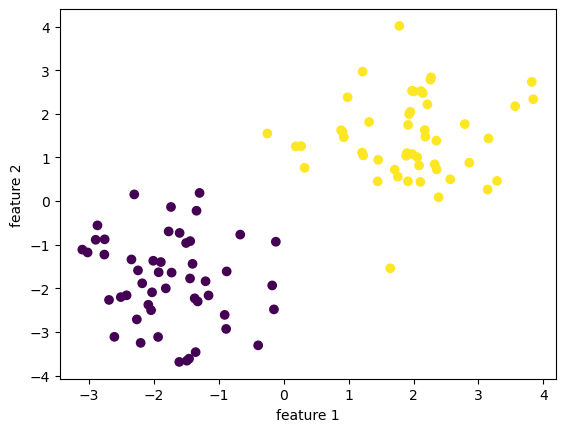

In [3]:
np.random.seed(42)
n=100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features=p_features-1, centers=[ (-1.7,-1.7, -1.7), (1.7,1.7, 1.7) ])

fig=plt.scatter(X[:,0], X[:,1], c=y)
xlab=plt.xlabel("feature 1")
ylab=plt.ylabel("feature 2")


### The Perceptron Algorithm 
Our goal is to find the separating line using the perceptron algorithm. The algorithm takes in our feature matrix `X` and our vector of labels `y`. As detailed in the source code (link at the start of the blog), the algorithm performs the following steps:
* Initialize the weights vector `w`
* Iterate through the data points (randomly), updating the weights `w` until either a user-specified maximum number of iteration is reached.
* record the accuracy score in `self.history`.

State in mathematical terms, we would like to apply the perceptron algorithm to find the hyperplane that separates those data points, given that they are separable (so perceptron algorithm will converge). A key equation in the perceptron algorithm that defines the update is the following:

### $$ \tilde{w}^{(t+1)} = \tilde{w}^{t} + \mathbb{1} (\tilde{y}_i \langle \tilde{w}^{(t)}, \tilde{x}_i \rangle < 0)\tilde{y}_i\tilde{x}_i.$$
And this will provide us with the step to update `w` in each iteration.

In [34]:
from perceptron import Perceptron

p = Perceptron()
p.fit(X, y, maxiter=10000)

print(p.history[-10:])
print(p.w_)
# print(X)

# print(w)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[ 50.44366343  39.1028252   21.79442178 -40.        ]


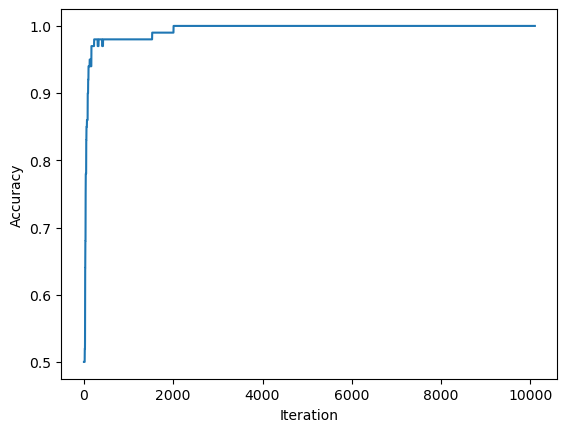

In [35]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

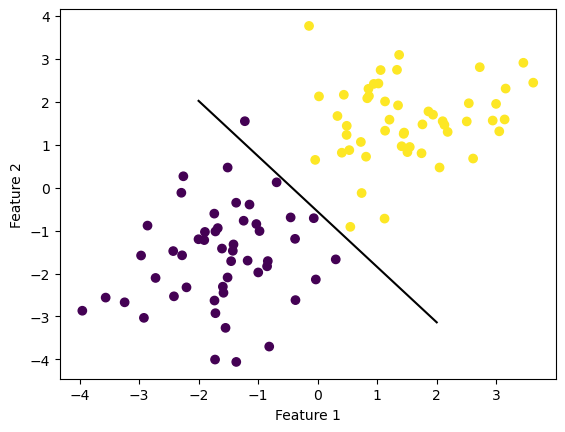

In [36]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w_, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [37]:
print(p.score(X,y))


1.0


In [32]:
print((1<2)*2)
print((1>2)*2)

2
0


In [38]:
print(p.predict(X))
print("\n\n")
print(y)

[1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0]



[1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0]


In [30]:
print(p.w_)
print(np.size(p.w_))

[39.71808898 55.01564117 -7.        ]
3


### Time complexity for update step 

Recall our equation for the update step:
$$ \tilde{w}^{(t+1)} = \tilde{w}^{t} + \mathbb{1} (\tilde{y}_i \langle \tilde{w}^{(t)}, \tilde{x}_i \rangle < 0)\tilde{y}_i\tilde{x}_i.$$
This involves taking an inner product $ \langle \tilde{w}^{(t)}, \tilde{x}_i \rangle, $ which has time complexity $O(p)$ where $p$ is a constant denoting the number of features. The other operations are addition, multiplication, taking the simple (step) function, which have constant time complexity $O(1)$.